In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np

C:\Users\Mykhailo Kushnir\AppData\Local\Temp\ipykernel_22804\1583864206.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
C:\Users\Mykhailo Kushnir\AppData\Local\Temp\ipykernel_22804\1583864206.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
C:\Users\Mykhailo Kushnir\AppData\Local\Temp\ipykernel_22804\1583864206.py:2: FutureWarning: The default value of 

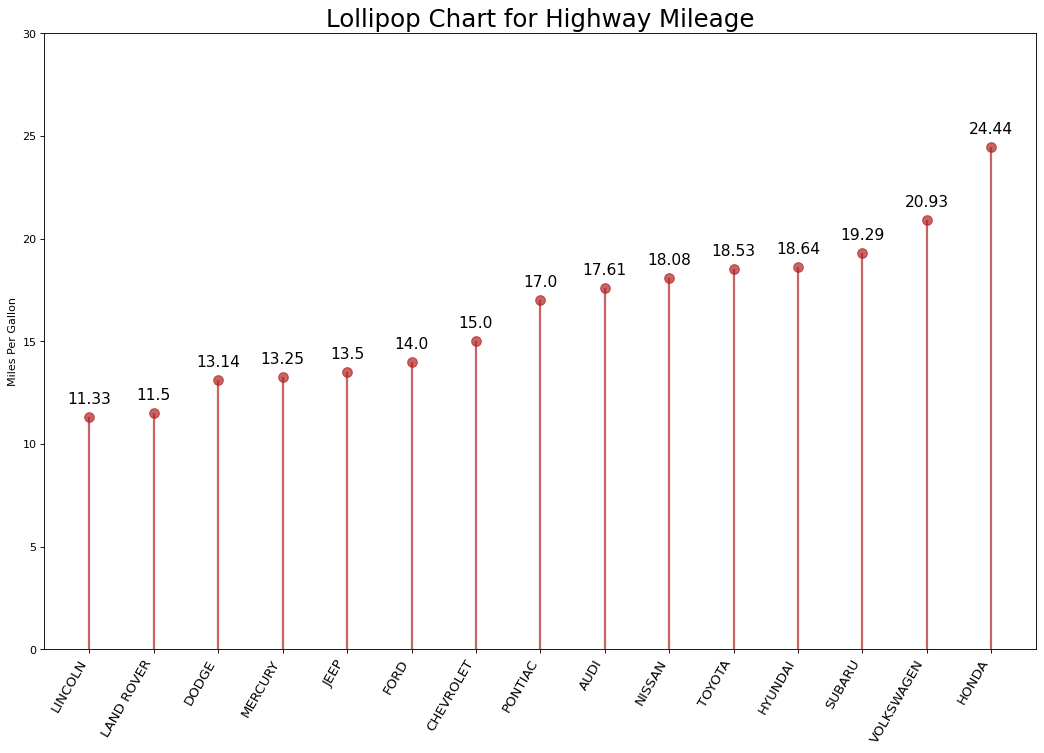

In [19]:
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)
def lolipop1(df):
    # Draw plot
    fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
    ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
    ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

    # Title, Label, Ticks and Ylim
    ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
    ax.set_ylabel('Miles Per Gallon')
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
    ax.set_ylim(0, 30)

    # ф
    for row in df.itertuples():
        ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

    plt.show()
lolipop1(df)

In [4]:
print(plt.__version__)

3.8.1


AttributeError: module 'matplotlib' has no attribute 'figure'

Name: matplotlib
Version: 3.8.1
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: C:\Users\Mykhailo Kushnir\anaconda3\Lib\site-packages
Requires: contourpy, cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: seaborn


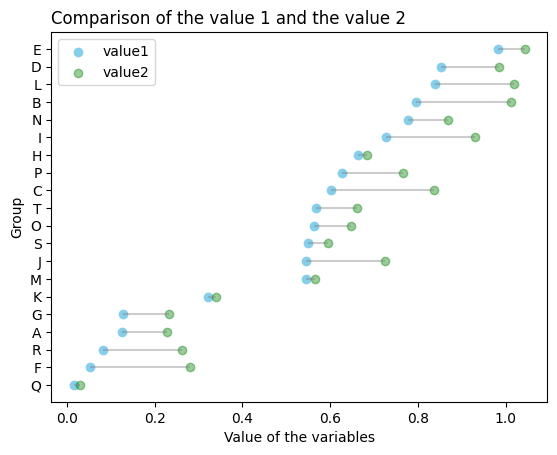

In [6]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
# Create a dataframe
value1=np.random.uniform(size=20)
value2=value1+np.random.uniform(size=20)/4
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'value1':value1 , 'value2':value2 })
 
# Reorder it following the values of the first value:
ordered_df = df.sort_values(by='value1')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=ordered_df['value1'], xmax=ordered_df['value2'], color='grey', alpha=0.4)
plt.scatter(ordered_df['value1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(ordered_df['value2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()

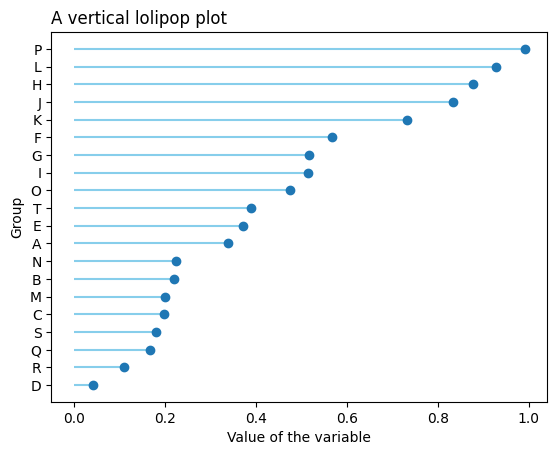

In [7]:
# libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# Create a dataframe
df = pd.DataFrame({'group':list(map(chr, range(65, 85))), 'values':np.random.uniform(size=20) })
 
# Reorder it based on the values
ordered_df = df.sort_values(by='values')
my_range=range(1,len(df.index)+1)
 
# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['values'], color='skyblue')
plt.plot(ordered_df['values'], my_range, "o")
 
# Add titles and axis names
plt.yticks(my_range, ordered_df['group'])
plt.title("A vertical lolipop plot", loc='left')
plt.xlabel('Value of the variable')
plt.ylabel('Group')

# Show the plot
plt.show()

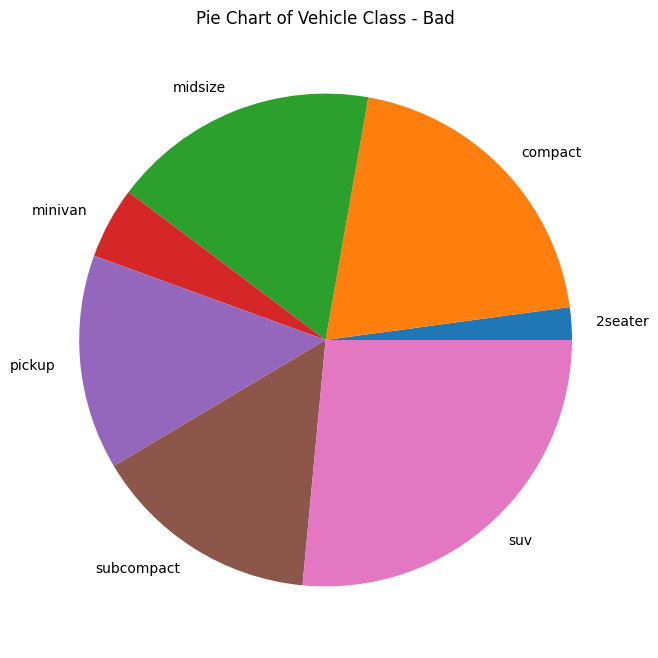

In [18]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size()
def pieChart(df):
    df.plot(kind='pie', subplots=True, figsize=(8, 8))
    plt.title("Pie Chart of Vehicle Class - Bad")
    plt.ylabel("")
    plt.show()
# Make the plot with pandas
pieChart(df)

TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

TypeError: Bbox.from_bounds() missing 1 required positional argument: 'height'

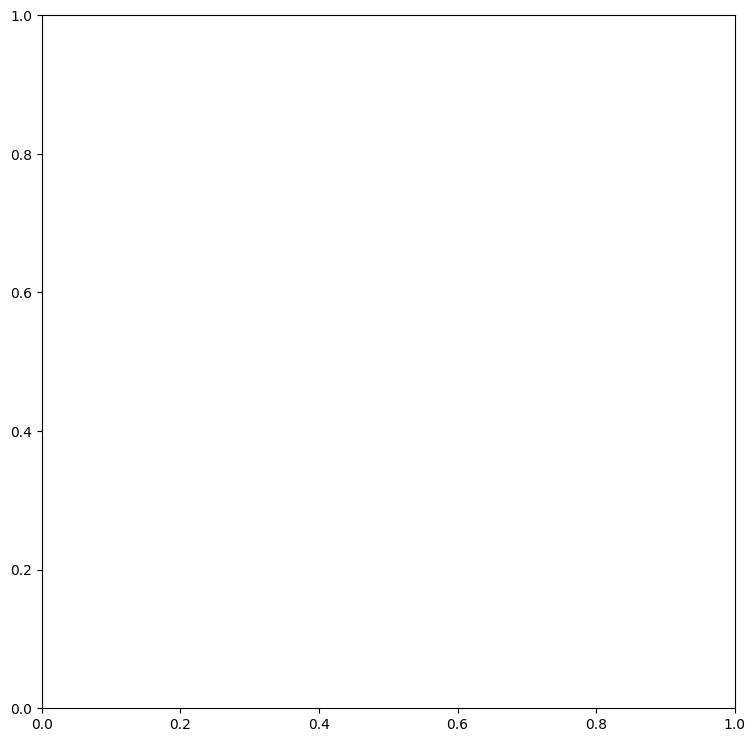

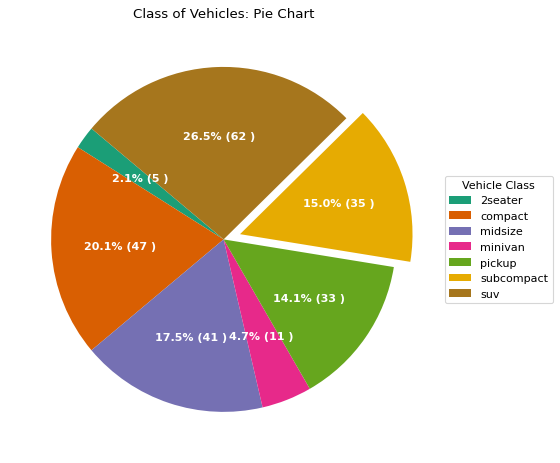

In [16]:
# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')

# Draw Plot
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = df['counts']
categories = df['class']
explode = [0,0,0,0,0,0.1,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.Dark2.colors,
                                 startangle=140,
                                 explode=explode)

# Decoration
ax.legend(wedges, categories, title="Vehicle Class", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Class of Vehicles: Pie Chart")
plt.show()